# Assignment 4: Random Forest & Gradient Boosting  
Jason Adam  
## Background Data  


* Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study.  
* Use one of two response variables: (1) the median value of homes in thousands of 1970 dollars or (2) the log median value of homes in thousands of 1970 dollars.  
* Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net.  
* Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.  
* Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.  

## Management Questions  
Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?  

## Variable Definitions  
| Variable Name | Description |
|--------------------------|---------------------|
| neighborhood | Name of the Boston neighborhood (location of the census tract)|
| mv | Median value of homes in thousands of 1970 dollars |
| nox | Air pollution (nitrogen oxide concentration) |
| crim | Crime rate |
| zn | Percent of land zoned for lots |
| indus | Percent of business that is industrial or nonretail |
| chas | On the Charles River (1) or not (0) |
| rooms | Average number of rooms per home |
| age | Percentage of homes built before 1940 |
| dis | Weighted distance to employment centers |
| rad | Accessibility to radial highways |
| tax | Tax rate |
| ptratio | Pupil/teacher ratio in public schools |
| lstat | Percentage of population of lower socio-economic status |





# Setup & Data Ingest

## Initial Imports

In [0]:
# Initial Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Initial Dataframe(s) Creation

In [0]:
# Read in Boston data
boston_df = pd.read_csv('https://raw.githubusercontent.com/Jason-Adam/MSDS-422-Practical-Machine-Learning/master/data/boston.csv')

# Exploratory Data Analysis (EDA)

## Data Cleaning

In [3]:
# View top 5 rows of data
boston_df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
# Review structure of the dataframe
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.4+ KB


In [5]:
# Drop null observations
boston_df.dropna()

# Review shape after null drops - shape is unchanged
boston_df.shape

(506, 14)

In [0]:
# Drop neighborhood column
boston_df.drop(columns='neighborhood', inplace=True)

## Train - Test Split  
We will split into train and test prior to performing any visualizations

In [0]:
# Import train test split from sci-kit learn
from sklearn.model_selection import train_test_split

In [0]:
# Split into train and test sets
train_set, test_set = train_test_split(boston_df, test_size=0.2, random_state=86)

In [9]:
# Verify that the split occurred
train_shape = train_set.shape
test_shape = test_set.shape

# Confirm the shape of the splits
print('Train set shape = {0}'.format(train_shape))
print('Test set shape = {0}'.format(test_shape))

Train set shape = (404, 13)
Test set shape = (102, 13)


## Visualizations

In [0]:
import scipy # Statistical functions

In [0]:
# Create copy as to not modify train set during exploration
viz_df = train_set.copy()

In [0]:
# Create new column that is log of median value
viz_df['log_mv'] = np.log(viz_df['mv'])

In [13]:
# Review out visualization set
viz_df.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,log_mv
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,8.26,20.4,3.015535
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8,15.76,18.3,2.906901
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,9.42,27.5,3.314186
405,67.92080,0.0,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0,1.609438
134,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,17.31,15.6,2.747271


In [14]:
# Get a sense for the different variables
viz_df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,log_mv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.833888,11.299505,11.121460,0.066832,0.556539,6.244176,68.503465,3.842516,9.524752,406.829208,18.507178,12.945644,21.872030,3.007712
std,9.302730,23.081593,6.818849,0.250040,0.118199,0.672160,28.321269,2.130254,8.697673,166.816426,2.165847,7.114182,8.780699,0.401526
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.980000,5.000000,1.609438
25%,0.081960,0.000000,5.175000,0.000000,0.449000,5.875750,44.225000,2.097050,4.000000,280.750000,17.375000,7.377500,16.500000,2.803360
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.168000,76.800000,3.361800,5.000000,330.000000,19.100000,11.570000,20.700000,3.030134
75%,3.681942,12.500000,18.100000,0.000000,0.631000,6.545250,94.325000,5.255350,24.000000,666.000000,20.200000,17.102500,24.500000,3.198673
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,37.970000,50.000000,3.912023


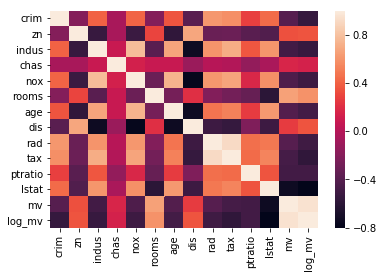

In [15]:
# Correlation Matrix
corr = viz_df.corr()

# Creat heatmap correlation matrix
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)

In [16]:
# Compare correlations for mv and log_mv
# We can see that some variables have a higher pearson correlation with log_mv
# than with mv
corr[['mv', 'log_mv']]

,mv,log_mv
crim,-0.400283,-0.546974
zn,0.344467,0.352472
indus,-0.486248,-0.541892
chas,0.162812,0.144939
nox,-0.434107,-0.513619
rooms,0.659963,0.598333
age,-0.414643,-0.485200
dis,0.260991,0.353127
rad,-0.396428,-0.505693
tax,-0.475442,-0.574254


[Text(0.5, 1.0, 'Median Value')]

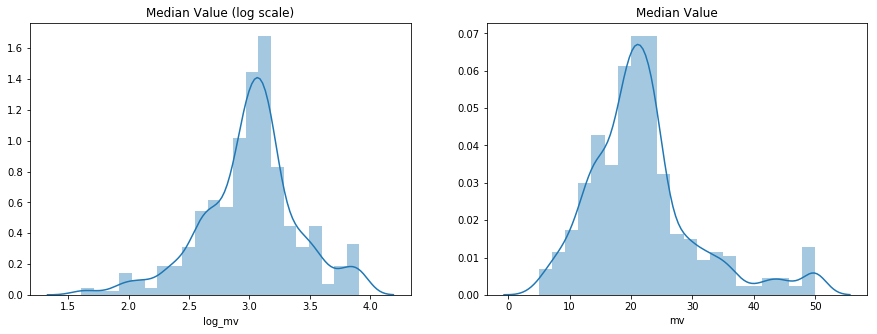

In [17]:
# Compare histograms of mv and log_mv
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Log transformed median value
sns.distplot(viz_df['log_mv'], ax=ax[0])
ax[0].set(title='Median Value (log scale)')

# Regular Median Value
sns.distplot(viz_df['mv'], ax=ax[1])
ax[1].set(title='Median Value')

In [18]:
# Compare Skew and Kurtosis of log_mv and mv
pd.DataFrame({
    'Target Variable': ['log_mv', 'mv'],
    'skew': [scipy.stats.skew(viz_df['log_mv']),
             scipy.stats.skew(viz_df['mv'])],
    'kurtosis': [scipy.stats.kurtosis(viz_df['log_mv']), 
                 scipy.stats.kurtosis(viz_df['mv'])]
})

,Target Variable,skew,kurtosis
0,log_mv,-0.361749,0.987653
1,mv,1.169941,1.890833


*We can see that our log transformed median value variable is less skewed*

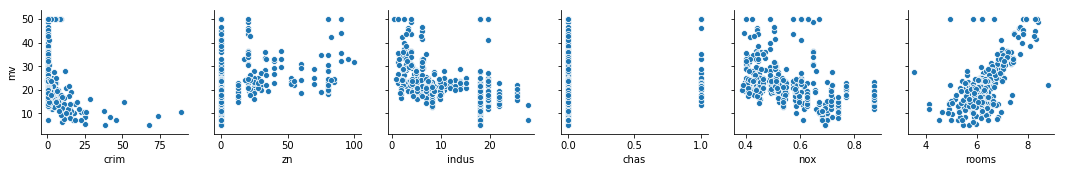

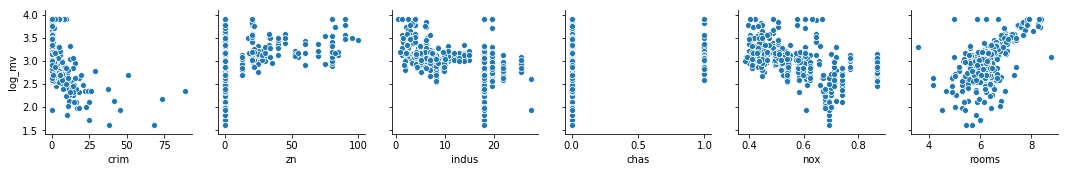

In [19]:
# Compare scatterplots of each variable against mv and log_mv
sns.pairplot(data=viz_df, y_vars='mv',x_vars=viz_df.columns[0:6])
sns.pairplot(data=viz_df, y_vars='log_mv', x_vars=viz_df.columns[0:6])

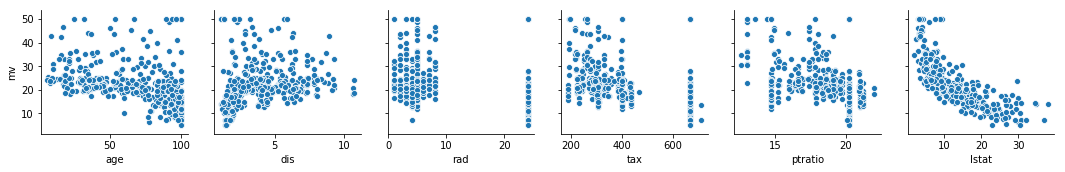

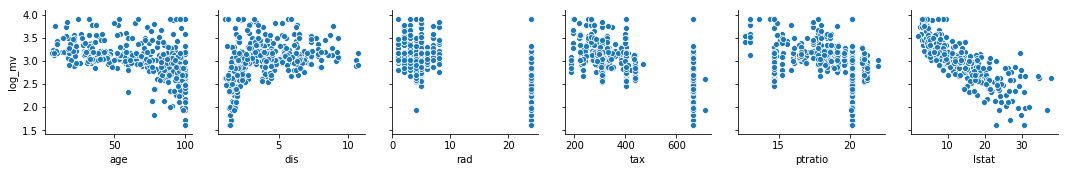

In [20]:
# Compare scatterplots of remaining variable against mv and log_mv
sns.pairplot(data=viz_df, y_vars='mv',x_vars=viz_df.columns[6:-2])
sns.pairplot(data=viz_df, y_vars='log_mv', x_vars=viz_df.columns[6:-2])

[Text(0, 0.5, 'Log mv'),
 Text(0.5, 0, 'log dis'),
 Text(0.5, 1.0, 'Log Dis vs Log mv')]

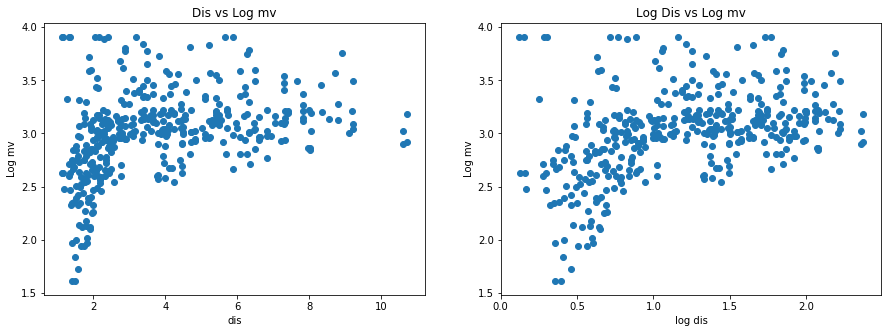

In [21]:
# Experiment transforming different variables
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(viz_df['dis'], viz_df['log_mv'])
ax[0].set(xlabel='dis', ylabel='Log mv', title='Dis vs Log mv')

ax[1].scatter(np.log(viz_df['dis']), viz_df['log_mv'])
ax[1].set(xlabel='log dis', ylabel='Log mv', title='Log Dis vs Log mv')

# Modeling

## Scale the Training Data

In [0]:
from sklearn.preprocessing import StandardScaler # Scale features for linear modeling

In [23]:
# Add log transformed mv feature to training set
train_set['log_mv'] = np.log(train_set['mv'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# Create scaling object
std_scaler = StandardScaler()

# Create scaled train set for modeling
scaled_train = std_scaler.fit_transform(train_set)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
# Get column names from train_set
col_list = train_set.columns.tolist()

# Create scaled_df for training
scaled_df_train = pd.DataFrame(scaled_train, columns=col_list)

# View scaled train df
scaled_df_train.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,log_mv
0,-0.344856,-0.490153,-0.437780,-0.267615,-0.157037,-0.439690,-0.236987,0.406551,-0.635987,-0.599180,1.152396,-0.659451,-0.167852,0.019508
1,-0.394195,-0.490153,-0.163200,-0.267615,-0.080800,-0.470971,0.696330,-0.648339,-0.405755,0.151076,-0.326918,0.396089,-0.407309,-0.251379
2,-0.396636,-0.490153,-0.376110,-0.267615,-0.309512,0.719208,0.402901,-0.500427,-0.520871,-0.137022,1.106167,-0.496194,0.641743,0.764220
3,6.897585,-0.490153,1.024688,-0.267615,1.155938,-0.835920,1.113495,-1.136068,1.666330,1.555555,0.782567,1.412221,-1.923873,-3.486713
4,-0.307572,-0.490153,1.581189,-0.267615,0.571453,-0.725690,1.056930,-0.703377,-0.635987,0.181086,1.244853,0.614233,-0.715183,-0.649431


## Scale the Test Data

In [26]:
# Add log transformed mv
test_set['log_mv'] = np.log(test_set['mv'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
# Standard scaling transformation
scaled_test = std_scaler.fit_transform(test_set)

# Create scaled df test
scaled_df_test = pd.DataFrame(scaled_test, columns=col_list)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Ridge Regression

### Median Value Target Variable

#### Cross Validation on Median Value (mv)

In [0]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from yellowbrick.regressor import AlphaSelection

In [0]:
# Create array of different alpha values to test
alpha_ridge = np.linspace(1, 10, 100)

In [0]:
# Create Ridge Regression object
ridge_reg = RidgeCV(alphas=alpha_ridge)

In [0]:
# Split the train df into x & y (create two y to test)
x_train = scaled_df_train[['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 
                           'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
y_train_mv = scaled_df_train['mv']
y_train_log_mv = scaled_df_train['log_mv']

In [32]:
# Fit the model
ridge_reg.fit(x_train, y_train_mv)

RidgeCV(alphas=array([ 1.     ,  1.09091, ...,  9.90909, 10.     ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [33]:
# Coefficients
ridge_reg.coef_

array([-0.12989854,  0.10766595, -0.03525021,  0.08157636, -0.21502918,
        0.25408013, -0.01170705, -0.36578197,  0.25752651, -0.23531196,
       -0.20096433, -0.43083262])

In [0]:
# Create prediction array
y_pred_mv = ridge_reg.predict(x_train)

In [35]:
# Calculate RMSE
ridgecv_mv_rmse_train = sqrt(mean_squared_error(y_train_mv, y_pred_mv))
ridgecv_mv_rmse_train

0.5283940570125274

In [36]:
# Optimum alpha value
ridge_reg.alpha_

4.545454545454545

In [37]:
# R^2 score
ridge_mv_rsquare = ridge_reg.score(x_train, y_train_mv)
ridge_mv_rsquare

0.7207997205138419

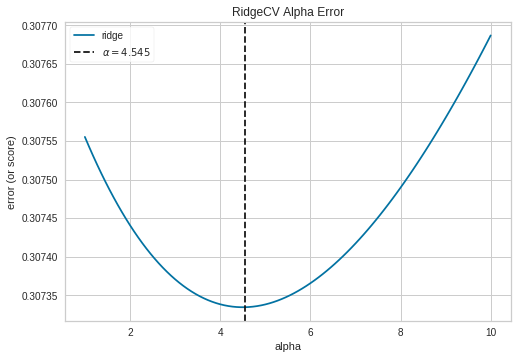

In [38]:
# Visualize the optimum alpha value using yellobrick
visualizer = AlphaSelection(ridge_reg)

visualizer.fit(x_train, y_train_mv)
g = visualizer.poof()

#### Apply Model to Test Data

In [0]:
# Create x, y test data
x_test = scaled_df_test[['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 
                         'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
y_test_mv = scaled_df_test['mv']
y_test_log_mv = scaled_df_test['log_mv']

In [0]:
# Create predictions
y_test_pred = ridge_reg.predict(x_test)

In [41]:
# RMSE on test data
ridgedv_mv_rmse_test = sqrt(mean_squared_error(y_test_mv, y_test_pred))
ridgedv_mv_rmse_test

0.496090582892223

*The RMSE is slightly higher on our test data, indicating that our model generalized fairly well.*

### Log Transformed Median Value Target Variable

#### Cross Validation on Median Value (log_mv)

In [42]:
# Fit the model
ridge_reg.fit(x_train, y_train_log_mv)

RidgeCV(alphas=array([ 1.     ,  1.09091, ...,  9.90909, 10.     ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

In [0]:
# Create predictions
y_pred_logmv = ridge_reg.predict(x_train)

In [44]:
# RMSE
ridgecv_logmv_rmse_train = sqrt(mean_squared_error(y_train_log_mv, y_pred_logmv))
ridgecv_logmv_rmse_train

0.4616256632044937

In [45]:
# Optimum Alpha value
ridge_reg.alpha_

4.363636363636363

In [46]:
# R^2 Score
ridge_reg.score(x_train, y_train_log_mv)

0.7869017470710113

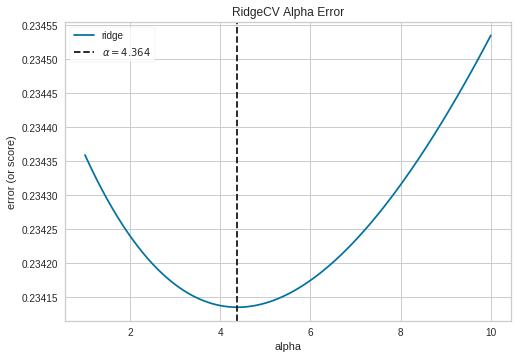

In [47]:
# Visualize optimum alpha
visualizer = AlphaSelection(ridge_reg)

visualizer.fit(x_train, y_train_log_mv)
g = visualizer.poof()

#### Apply Model to Test Data

In [0]:
# Generate predictions on test set
y_test_pred_log = ridge_reg.predict(x_test)

In [49]:
# RMSE of test set
ridgecv_logmv_rmse_test = sqrt(mean_squared_error(y_test_log_mv, y_test_pred_log))
ridgecv_logmv_rmse_test

0.5004930419944893

## Lasso Regression

### Median Value Target Variable

#### Cross Validation on Median Value (mv)

In [0]:
# Import correct CV models
from sklearn.linear_model import LassoCV, ElasticNetCV

In [0]:
# Set alpha array for lasso regression
lasso_alpha = np.logspace(-10, 1, 400)

In [0]:
# Create model object
lasso_reg = LassoCV(alphas=lasso_alpha, cv=10)

In [53]:
# Fit the model
lasso_reg.fit(x_train, y_train_mv)

LassoCV(alphas=array([1.00000e-10, 1.06554e-10, ..., 9.38493e+00, 1.00000e+01]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [0]:
# Predict training values
y_pred_mv = lasso_reg.predict(x_train)

In [55]:
# Optimum Alpha value
lasso_reg.alpha_

0.0024460829357967956

In [56]:
# RMSE
lassocv_mv_rmse_train = sqrt(mean_squared_error(y_train_mv, y_pred_mv))
lassocv_mv_rmse_train

0.5282791796253435

In [57]:
# R^2 Score
lasso_reg.score(x_train, y_train_mv)

0.7209211083743742

#### Apply Model to Test Data

In [58]:
# Create predictions
y_test_pred_lass = lasso_reg.predict(x_test)

# RMSE on test data
lassocv_mv_rmse_test = sqrt(mean_squared_error(y_test_mv, y_test_pred_lass))
lassocv_mv_rmse_test

0.4956052881537852

### Log Transformed Median Value Target Variable

#### Cross Validation on Median Value (log_mv)

In [59]:
# Fit the model
lasso_reg.fit(x_train, y_train_log_mv)

LassoCV(alphas=array([1.00000e-10, 1.06554e-10, ..., 9.38493e+00, 1.00000e+01]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [0]:
# Predict training values
y_pred_mv_log = lasso_reg.predict(x_train)

In [61]:
# Optimum Alpha value
lasso_reg.alpha_

0.003359818286283781

In [62]:
# RMSE
lassocv_logmv_rmse_train = sqrt(mean_squared_error(y_train_log_mv, y_pred_mv_log))
lassocv_logmv_rmse_train

0.461909560280521

In [63]:
# R^2 Score
lasso_reg.score(x_train, y_train_log_mv)

0.7866395581214557

#### Apply Model to Test Data

In [64]:
# Create predictions
y_test_pred_lass_mv = lasso_reg.predict(x_test)

# RMSE on test data
lassocv_logmv_rmse_test = sqrt(mean_squared_error(y_test_log_mv, y_test_pred_lass_mv))
lassocv_logmv_rmse_test

0.5010638048518355

## Elastic Net Regression

### Median Value Target Variable

#### Cross Validation on Median Value (mv)

In [0]:
# Create model object
en_reg = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=10)

In [66]:
# Fit the model
en_reg.fit(x_train, y_train_mv)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [0]:
# Predict values on training set
y_pred_mv_en = en_reg.predict(x_train)

In [68]:
# Print alpha and l1 ratio
print(en_reg.alpha_)
print(en_reg.l1_ratio_)

0.012807385855867718
0.1


In [69]:
# RMSE
encv_mv_rmse_train = sqrt(mean_squared_error(y_train_mv, y_pred_mv_en))
encv_mv_rmse_train

0.5287552533783393

In [70]:
# R^2 Score
en_reg.score(x_train, y_train_mv)

0.7204178820248082

#### Apply Model to Test Data

In [71]:
# Create predictions
y_test_pred_en = en_reg.predict(x_test)

# RMSE on test data
encv_mv_rmse_test = sqrt(mean_squared_error(y_test_mv, y_test_pred_en))
encv_mv_rmse_test

0.49478287763727663

### Log Transformed Median Value Target Variable

#### Cross Validation on Median Value (log_mv)

In [72]:
# Fit the model
en_reg.fit(x_train, y_train_log_mv)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [0]:
# Predict values on training set
y_pred_logmv_en = en_reg.predict(x_train)

In [74]:
# Print alpha and l1 ratio
print(en_reg.alpha_)
print(en_reg.l1_ratio_)

0.014028230048038309
0.1


In [75]:
# RMSE
encv_logmv_rmse_train = sqrt(mean_squared_error(y_train_log_mv, y_pred_logmv_en))
encv_logmv_rmse_train

0.46227432173224686

In [76]:
# R^2 Score
en_reg.score(x_train, y_train_log_mv)

0.7863024514669912

#### Apply Model to Test Data

In [77]:
# Create predictions
y_test_pred_en_log = en_reg.predict(x_test)

# RMSE on test data
encv_logmv_rmse_test = sqrt(mean_squared_error(y_test_log_mv, y_test_pred_en_log))
encv_logmv_rmse_test

0.5002711849065141

## Create Table of Results

In [0]:
# Create dataframe of RMSE results
rmse_df = pd.DataFrame({
    'Ridge MV': [ridgecv_mv_rmse_train, ridgedv_mv_rmse_test],
    'Ridge LogMV': [ridgecv_logmv_rmse_train, ridgecv_logmv_rmse_test],
    'Lasso MV': [lassocv_mv_rmse_train, lassocv_mv_rmse_test],
    'Lasso LogMV': [lassocv_logmv_rmse_train, lassocv_logmv_rmse_test],
    'Elastic Net MV': [encv_mv_rmse_train, encv_mv_rmse_test],
    'Elastic Net LogMV': [encv_logmv_rmse_train, encv_logmv_rmse_test]
}, index=['Train', 'Test'])

In [79]:
# View the df
rmse_df

,Ridge MV,Ridge LogMV,Lasso MV,Lasso LogMV,Elastic Net MV,Elastic Net LogMV
Train,0.528394,0.461626,0.528279,0.461910,0.528755,0.462274
Test,0.496091,0.500493,0.495605,0.501064,0.494783,0.500271


## Random Forest

### Median Value

In [0]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from yellowbrick.features.importances import FeatureImportances

In [0]:
# Instantiate model object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=True, bootstrap=True,
                           n_jobs=-1, min_samples_leaf=4, max_features='log2')

In [195]:
# Fit to train data
rf_reg.fit(x_train, y_train_mv)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=True, verbose=0, warm_start=False)

In [196]:
# Look at feature importance
fi_df = pd.DataFrame({
    'Feature': scaled_df_train.iloc[:, 0:-2].columns,
    'Feature_Importance': rf_reg.feature_importances_
})

fi_df

,Feature,Feature_Importance
0,crim,0.063914
1,zn,0.014196
2,indus,0.058248
3,chas,0.003380
4,nox,0.086469
5,rooms,0.249104
6,age,0.034179
7,dis,0.050526
8,rad,0.014569
9,tax,0.045467


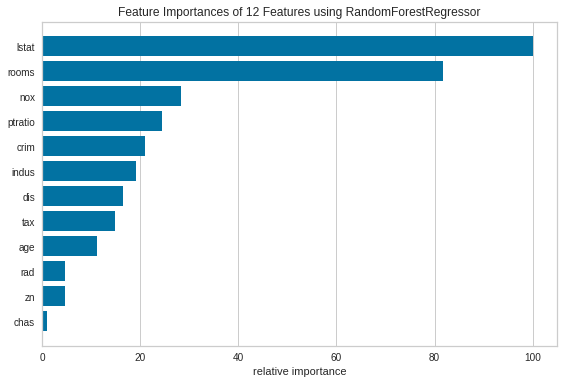

In [202]:
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

# Visualize most important features
viz = FeatureImportances(rf_reg, ax=ax)
viz.fit(x_train, y_train_mv)
viz.poof()

In [197]:
# Evaluate RMSE
y_pred_rf = rf_reg.predict(x_train)

np.sqrt(mean_squared_error(y_train_mv, y_pred_rf))

0.3031386872743739

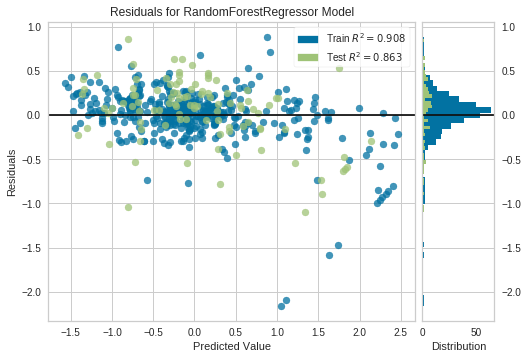

In [198]:
# Visualize the residuals plot
visualizer = ResidualsPlot(rf_reg)

visualizer.fit(x_train, y_train_mv)  # Fit the training data to the model
visualizer.score(x_test, y_test_mv)  # Evaluate the model on the test data
visualizer.poof()                    # Draw/show/poof the data

In [199]:
# Check RMSE on test data
y_pred_rf = rf_reg.predict(x_test)

np.sqrt(mean_squared_error(y_test_mv, y_pred_rf))

0.36982388658468585

### Random Grid Search for Optimal Parameters

In [108]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [109]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train_mv)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [110]:
# Optimal Parameters based on grid search
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [112]:
# See best estimator
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1800, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
# Create function to return RMSE and R squared
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    score = model.score(x_test, y_test)
    print('Model Performance')
    print('RMSE: {:0.4f}'.format(rmse))
    print('R Squared = {:0.2f}%'.format(score))

In [120]:
# Optimal Parameters from Grid Search
random_accuracy = evaluate(best_random, x_test, y_test_mv)
random_accuracy

Model Performance
RMSE: 0.3393
R Squared = 0.88%


In [200]:
# Regular Random Forest with random parameters
evaluate(rf_reg, x_test, y_test_mv)

Model Performance
RMSE: 0.3698
R Squared = 0.86%


## Gradient Boosting

In [0]:
# Import GBR
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
# Instantiate the model object and fit to the data
gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=100)
gbrt.fit(x_train, y_train_mv)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [127]:
# Review feature importances
gbrt.feature_importances_

array([0.0500902 , 0.00333713, 0.00616846, 0.000568  , 0.00953275,
       0.25448755, 0.01371011, 0.08771102, 0.00286897, 0.00580301,
       0.01161072, 0.55411208])

In [128]:
# Compare errors and determine optimal number of estimators
errors = [mean_squared_error(y_train_mv, y_pred)
          for y_pred in gbrt.staged_predict(x_train)]

bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=10, n_estimators=bst_n_estimators)

gbrt_best.fit(x_train, y_train_mv)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=98, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [153]:
# Min error
min_error = np.min(errors)
min_error

9.895424675428363e-08

Text(0.5, 1.0, 'Validation error (98 trees)')

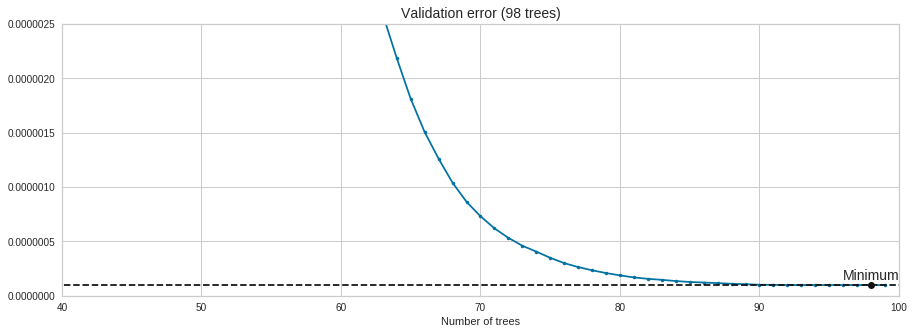

In [190]:
# Plot optimal number of trees based on error reduction
plt.figure(figsize=(15, 5))

plt.subplot()
plt.plot(errors, "b.-")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.5, "Minimum", ha="center", fontsize=14)
plt.axis([40, 100, 0, 0.0000025])
plt.xlabel("Number of trees")
plt.title("Validation error ({} trees)".format(bst_n_estimators), fontsize=14)

In [191]:
# Evaluate gbrt
evaluate(gbrt, x_test, y_test_mv)

Model Performance
RMSE: 0.3895
R Squared = 0.85%


In [193]:
# Evaluate gbrt with optimal number of trees
evaluate(gbrt_best, x_test, y_test_mv)

Model Performance
RMSE: 0.3955
R Squared = 0.84%


# Management Recommendation 
Management should utilize the Random Forest regression model.  This model achieved the lowest error out of all the models. It is a drastic improvement over the linear models and generalizes better to new data coming in. The model indicates that the lstat and rooms variables are the most important features for determining median home value. These represent the percentage of the population in a lower socio-economic status and number of rooms respectively.